In [42]:
# imoprting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# importing the data
car_fuel_eff_df = pd.read_csv('car_fuel_efficiency.csv')
car_fuel_eff_df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [44]:
# normalizing string columns values - lowercase & replacing spaces with underscores
object_cols = car_fuel_eff_df.dtypes[car_fuel_eff_df.dtypes == 'object'].index
car_fuel_eff_df[object_cols] = car_fuel_eff_df[object_cols].apply(lambda val: val.str.lower().str.replace(' ', '_'))

car_fuel_eff_df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


In [45]:
# data prep for regression
# subsetting the needed columns
feature_list = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

cfe_reg_df = car_fuel_eff_df[feature_list]

cfe_reg_df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [46]:
# exploring the data
cfe_reg_df.describe(include='all')

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


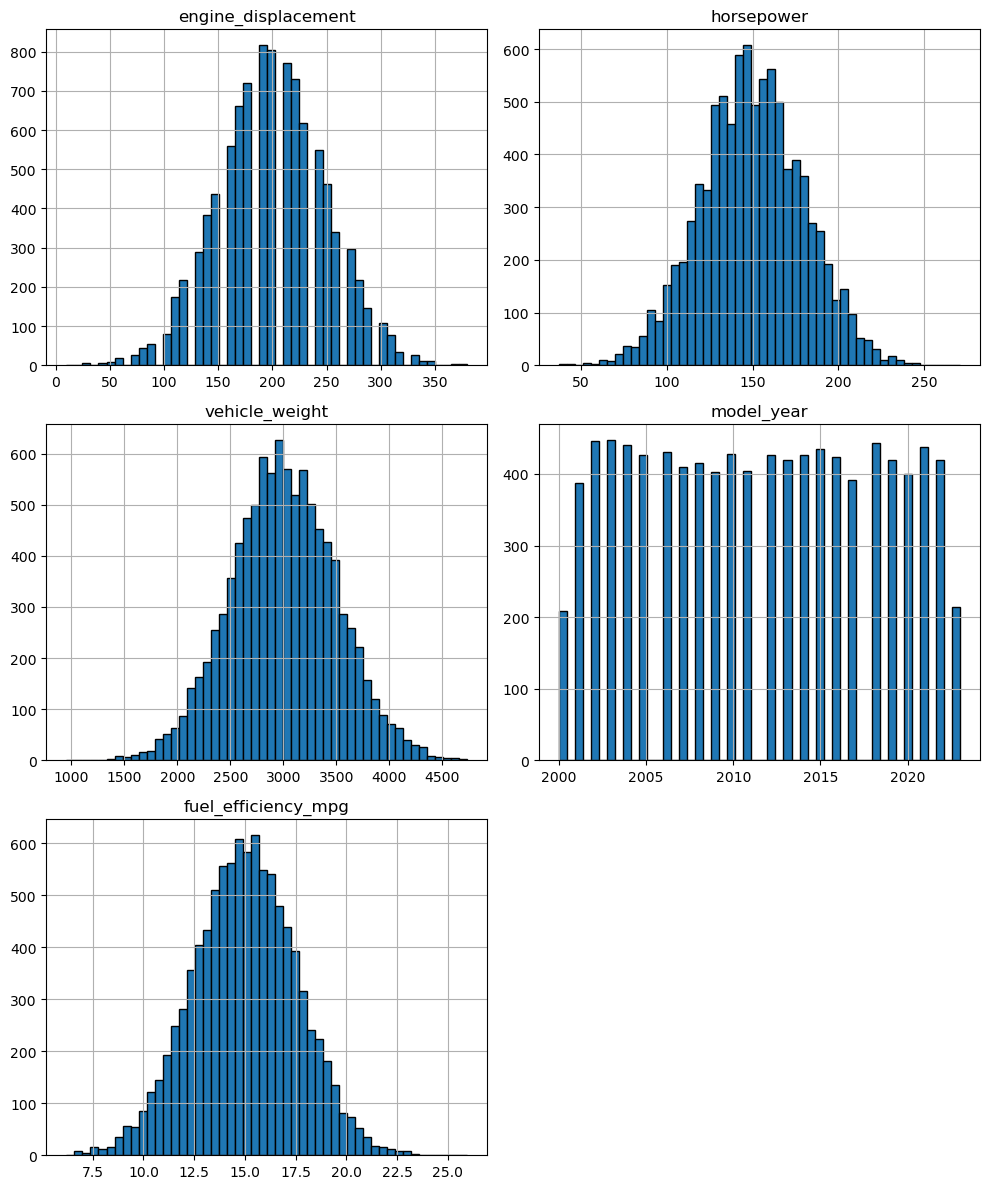

In [47]:
# visualizing the variables
cfe_reg_df.hist(figsize=(10, 12), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()

In [48]:
# QUESTION 1
# finding column with null values
print(cfe_reg_df.isnull().sum())

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


In [49]:
# QUESTION 2
print('Median horsepower with null values:', cfe_reg_df['horsepower'].median())

Median horsepower with null values: 149.0


In [ ]:
# fn for splitting the train test validation sets

def split_train_val_test(df, val_prop, test_prop, seed):
    # total records
    n = len(df)

    # train test validation proportions
    n_val = int(n*val_prop)
    n_test = int(n*test_prop)
    n_train = n - (n_val + n_test)

    # creating index
    idx = np.arange(n)

    # setting a seed and shuffling the index using random shuffle
    np.random.seed(seed)
    np.random.shuffle(idx)

    # splitting the sets
    df_train = df.iloc[ idx[:n_train] ]
    df_val = df.iloc[ idx[n_train : n_train+n_val] ]
    df_test = df.iloc[ idx[n_train+n_val:] ]

    # number of records in each train val test sets
    print(n, len(df_train)+len(df_val)+len(df_test))
    print(len(df_train), len(df_val), len(df_test))
    print(round(len(df_train)/n,2), round(len(df_val)/n,2), round(len(df_test)/n,2))

    # reset indices
    df_train = df_train.reset_index(drop=True)
    df_val = df_train.reset_index(drop=True)
    df_test = df_train.reset_index(drop=True)

    return df_train, df_val, df_test

In [ ]:
# performing the split
df_train, df_val, df_test = split_train_val_test(cfe_reg_df, 0.2, 0.2, 42)

9704 9704
5824 1940 1940
0.6 0.2 0.2


In [ ]:
# subsetting target variables and feature set
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# removing y variables from train val test dataframes
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


print(df_train.columns)

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year'], dtype='object')
